### The predictive modeling of used car pricing is based on the following steps:

Step 1: Quick Overview of the Data Structure

Step 2: Prepare Dataset (Training, Validation, and Test Data)

Step 3: Discover and Visualize the Data

Step 4: Data Preprocessing

Step 5: Model Selection and Training

Step 6: Evalute Models on the Test Data

In [90]:
#import libraries
import os
import pandas as pd
import numpy as np

%matplotlib inline 
import matplotlib.pyplot as plt

In [91]:
#import used_car dataset 
df=pd.read_csv('data/used_car_dataset.csv')

### Step 1: Quick Overview of the Data Structure

In [92]:
#check variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         9997 non-null   float64
 1   year          9997 non-null   float64
 2   manufacturer  9997 non-null   object 
 3   condition     9997 non-null   object 
 4   cylinders     9997 non-null   object 
 5   fuel          9997 non-null   object 
 6   odometer      9331 non-null   float64
 7   transmission  9997 non-null   object 
 8   type          9997 non-null   object 
 9   paint_color   9997 non-null   object 
 10  F1            9997 non-null   int64  
 11  F2            9997 non-null   float64
 12  F3            9997 non-null   float64
 13  F4            9997 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 1.1+ MB


In [93]:
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,type,paint_color,F1,F2,F3,F4
0,18219.0,2008.0,ford,excellent,8 cylinders,gas,86238.0,automatic,pickup,black,5823,2.193844,-0.031986,b
1,800.0,2008.0,ford,excellent,6 cylinders,gas,170953.0,automatic,SUV,red,2024,2.133691,0.097985,b
2,23660.0,2016.0,ford,good,8 cylinders,gas,119026.0,automatic,truck,white,294,2.160859,0.046984,c
3,5335.0,2009.0,ford,excellent,4 cylinders,gas,69000.0,manual,sedan,blue,3544,2.114929,-0.110121,c
4,1597.0,1999.0,ford,good,6 cylinders,gas,59130.0,automatic,sedan,blue,1329,1.829625,-0.060615,c


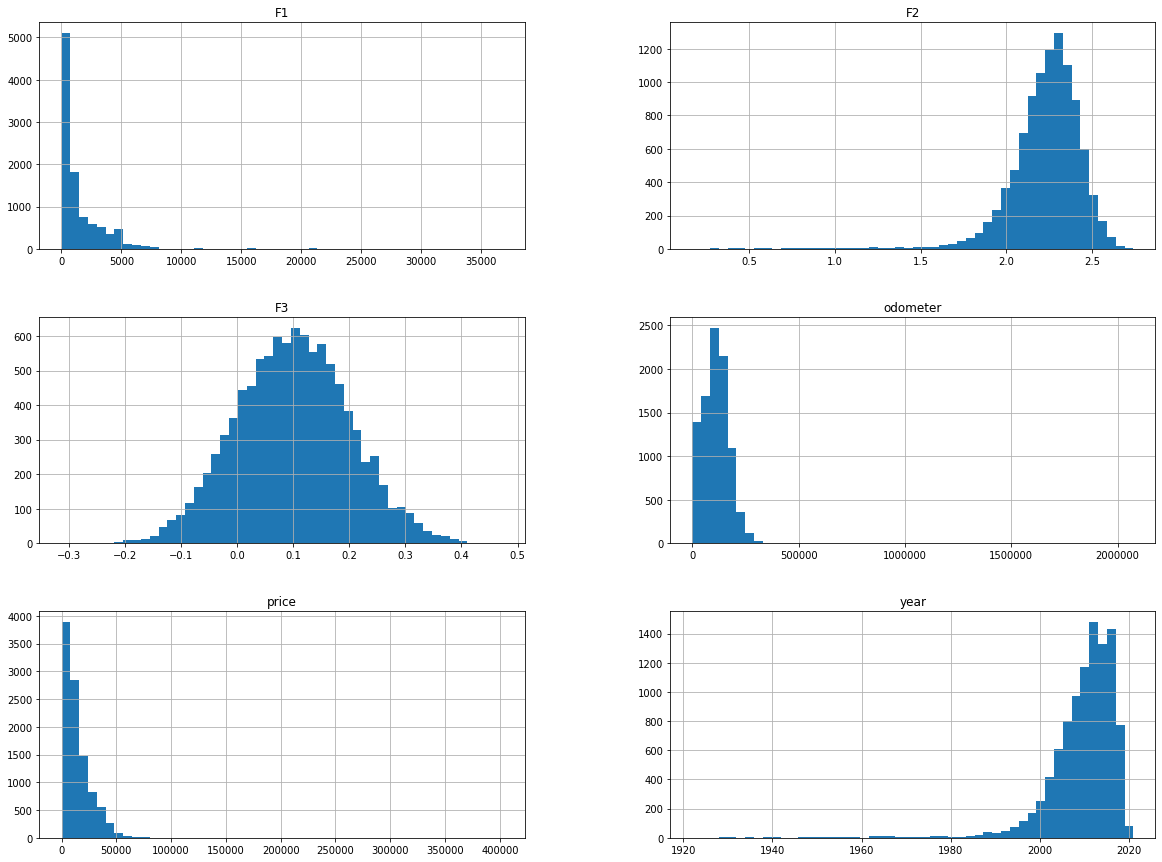

In [94]:
#Snapshot of histogram for numerical variables (Geron, 2019)
df.hist(bins=50, figsize=(20,15)) 
plt.show()

From the histograms above, we see that only F3 variable has a normal distribution, which means we need to standardize all independet numerical variables in the future steps.

In [95]:
#Descriptive information of Used Car Dataset
df.describe()

,price,year,odometer,F1,F2,F3
count,9997.000000,9997.000000,9.331000e+03,9997.000000,9997.000000,9997.000000
mean,14262.349305,2009.814144,1.120436e+05,1523.945584,2.225496,0.099283
std,12520.818169,8.862341,8.055942e+04,2090.438720,0.227250,0.100833
min,0.000000,1922.000000,0.000000e+00,4.000000,0.167352,-0.313948
25%,5643.000000,2007.000000,6.653300e+04,311.000000,2.133806,0.029968
50%,10463.000000,2012.000000,1.100000e+05,717.000000,2.255670,0.099648
75%,19464.000000,2015.000000,1.500000e+05,1966.000000,2.362382,0.167504
max,402498.000000,2021.000000,2.074484e+06,36773.000000,2.742570,0.473412


In [96]:
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,type,paint_color,F1,F2,F3,F4
0,18219.0,2008.0,ford,excellent,8 cylinders,gas,86238.0,automatic,pickup,black,5823,2.193844,-0.031986,b
1,800.0,2008.0,ford,excellent,6 cylinders,gas,170953.0,automatic,SUV,red,2024,2.133691,0.097985,b
2,23660.0,2016.0,ford,good,8 cylinders,gas,119026.0,automatic,truck,white,294,2.160859,0.046984,c
3,5335.0,2009.0,ford,excellent,4 cylinders,gas,69000.0,manual,sedan,blue,3544,2.114929,-0.110121,c
4,1597.0,1999.0,ford,good,6 cylinders,gas,59130.0,automatic,sedan,blue,1329,1.829625,-0.060615,c


In [97]:
#Show the distribution by percentage of categorial variables 
def show_cat_distribution(df,x):
    return print(df[x].value_counts()/len(df))

categorical_features=['manufacturer', 'condition','cylinders','fuel','transmission','type','paint_color','F4']
for x in categorical_features:
    show_cat_distribution(df,x)
    print('\n')

ford      0.90107
subaru    0.09893
Name: manufacturer, dtype: float64


excellent    0.488046
good         0.356807
like new     0.118135
fair         0.037011
Name: condition, dtype: float64


6 cylinders    0.363809
8 cylinders    0.323397
4 cylinders    0.312794
Name: cylinders, dtype: float64


gas    1.0
Name: fuel, dtype: float64


automatic    0.944283
manual       0.055717
Name: transmission, dtype: float64


SUV       0.306592
sedan     0.262679
truck     0.256977
pickup    0.173752
Name: type, dtype: float64


white     0.339002
black     0.205262
silver    0.160448
red       0.158047
blue      0.137241
Name: paint_color, dtype: float64


b    0.343903
a    0.331399
c    0.324697
Name: F4, dtype: float64




Based on the distribution of categorical variables, we see there is only one type of gas (i.e. fuel) for all used cars. Therefore, we would remove this variable in the future data processing.

### Step 2: Prepare Dataset (Training, Validation, and Test Data)

In [98]:
# Use stratified sampling method to generate training and test data (Geron, 2019)
# The sampling is based on two categorical variables: 'condition' and 'type'. 
# These two variables were selected because they are most likely to influence the used car pricing based on our common knowledge
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df,df['condition'],df['type']):
    strat_train_set = df.loc[train_index]
    strat_test_set=df.loc[test_index]

In [99]:
#Verify the percentage distribution of training and test data based on 'condition' categories
show_cat_distribution(df,'condition')
show_cat_distribution(strat_train_set,'condition')
show_cat_distribution(strat_test_set,'condition')

excellent    0.488046
good         0.356807
like new     0.118135
fair         0.037011
Name: condition, dtype: float64
excellent    0.488058
good         0.356759
like new     0.118169
fair         0.037014
Name: condition, dtype: float64
excellent    0.488
good         0.357
like new     0.118
fair         0.037
Name: condition, dtype: float64


In [100]:
#Verify the percentage distribution of training and test data based on 'type' categories
show_cat_distribution(df,'type')
show_cat_distribution(strat_train_set,'type')
show_cat_distribution(strat_test_set,'type')

SUV       0.306592
sedan     0.262679
truck     0.256977
pickup    0.173752
Name: type, dtype: float64
SUV       0.304364
sedan     0.265099
truck     0.254846
pickup    0.175691
Name: type, dtype: float64
SUV       0.3155
truck     0.2655
sedan     0.2530
pickup    0.1660
Name: type, dtype: float64


According to the percentage distribution of training and test datasets, we are confident that our stratified sampling has similar distribution with our original dataset

### Step 3: Discover and Visualize the Data

In [199]:
#Prepare a copy of the training data in case we need to retrieve the original training data (Geron, 2019)
car=strat_train_set.copy()

In [200]:
#Check the correlation between all numerial variables (Geron, 2019)
corr_matrix =car.corr()
corr_matrix

,price,year,odometer,F1,F2,F3
price,1.000000,0.341317,-0.402728,0.196141,0.305648,0.099316
year,0.341317,1.000000,-0.276159,0.190402,0.896289,0.003296
odometer,-0.402728,-0.276159,1.000000,-0.181019,-0.240668,-0.005137
F1,0.196141,0.190402,-0.181019,1.000000,0.170084,-0.001602
F2,0.305648,0.896289,-0.240668,0.170084,1.000000,0.014072
F3,0.099316,0.003296,-0.005137,-0.001602,0.014072,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028393748088>,
      dtype=object)

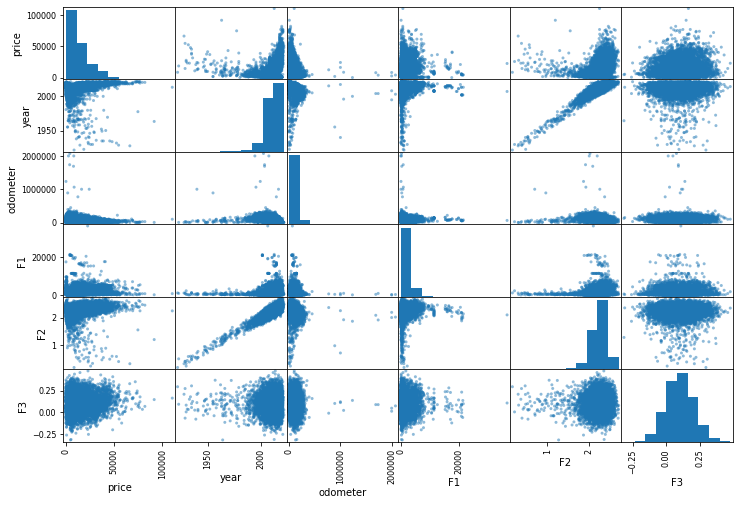

In [103]:
#Plat the correlation between all numerial variables (Geron, 2019)
from pandas.plotting import scatter_matrix

scatter_matrix(car,figsize=(12,8))

From graphs above, we see that 'year' and 'F2' are highly correlated, and none of the other paired variables have such a strong relationship. Additionally, we need to transform 'year'  to 'age' variable, which makes more sense in predicting used car values. 

In [201]:
# Create a pretransformation function for precleaning our dataset. 
# The function is created ahead because dividing 'ododmeter' by 'age' might result in infinite or NaN value, 
# making 'miles_per_year' variables unusable for generating scatter matrix. 

# For data points with missing/ imcomplete values, I choose to drop them instead of filling them with median values. 
# The reason is that I want to use the actual data points for modeling, instead of assigning  "assumed" values to them.
# Additionally, there were only around 40 data points which have missing values, which is a extremely small portion of the entire dataset.
# Dropping data points with missing values would have minimal effect on the data representation and modeling. 
def data_pretransform(df):
    df['age']=2021-df['year']
    df['miles_per_year']=df['odometer']/df['age']
    df=df.drop(columns=['year'])
    df=df.replace([np.inf, -np.inf], np.nan)
    df=df.dropna()
    return df

In [202]:
car=data_pretransform(car)

In [207]:
car

,price,manufacturer,condition,cylinders,fuel,odometer,transmission,type,paint_color,F1,F2,F3,F4,age,miles_per_year
3739,18606.0,ford,excellent,6 cylinders,gas,90717.0,automatic,truck,red,2469,2.372399,-0.046977,a,7.0,12959.571429
794,4223.0,ford,excellent,8 cylinders,gas,280000.0,automatic,truck,white,957,2.039515,0.063676,a,18.0,15555.555556
5345,18160.0,subaru,excellent,4 cylinders,gas,82191.0,automatic,sedan,black,3504,2.323291,0.240452,b,4.0,20547.750000
2251,46151.0,ford,good,8 cylinders,gas,37500.0,automatic,truck,black,1222,2.256581,0.204515,a,5.0,7500.000000
9732,25495.0,ford,excellent,6 cylinders,gas,18504.0,automatic,pickup,white,1504,2.408876,0.164162,c,8.0,2313.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7250,18088.0,ford,good,6 cylinders,gas,90856.0,automatic,truck,silver,584,2.335044,-0.047976,c,8.0,11357.000000
3534,5057.0,ford,good,4 cylinders,gas,132767.0,automatic,sedan,black,1077,2.407978,0.140567,a,7.0,18966.714286
9059,21483.0,ford,good,6 cylinders,gas,86174.0,automatic,SUV,black,1401,2.446547,0.217265,b,6.0,14362.333333
5686,2695.0,ford,good,4 cylinders,gas,128000.0,automatic,sedan,black,654,2.190766,0.097640,a,11.0,11636.363636


In [107]:
# Run correlation again to check the updated variable 'age'
corr_matrix =car.corr()
corr_matrix

,price,odometer,F1,F2,F3,age,miles_per_year
price,1.000000,-0.402204,0.201793,0.324016,0.101926,-0.368569,0.008025
odometer,-0.402204,1.000000,-0.181265,-0.240330,-0.005509,0.275797,0.538831
F1,0.201793,-0.181265,1.000000,0.169230,0.001800,-0.191261,-0.019123
F2,0.324016,-0.240330,0.169230,1.000000,0.020005,-0.881250,0.283986
F3,0.101926,-0.005509,0.001800,0.020005,1.000000,-0.009109,-0.007165
age,-0.368569,0.275797,-0.191261,-0.881250,-0.009109,1.000000,-0.320614
miles_per_year,0.008025,0.538831,-0.019123,0.283986,-0.007165,-0.320614,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002839422E3C8>,
      dtype=object)

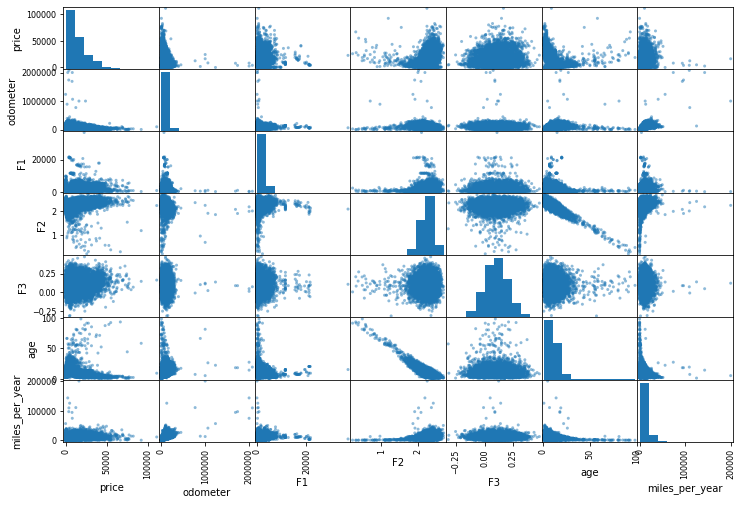

In [108]:
#Run scatter matrix again to check the pattern of correlation with the updated variable 'age'
scatter_matrix(car,figsize=(12,8))

According to both correlation table and scatter matrix, we see that after we transform 'year' to 'age', it still has high correlation with 'F2' variable. In fact, the correlation between the two is around 0.88, which means they are highly correlated. Having two variables that are highly correlated might lead to difficulties when interpreting predictors (James, 2017). Since 'age' is a known variable, and it is quite common to think that age is substantially related to the value of used cars, we will drop 'F2' in our modeling process.  

### Step 4: Data Preprocessing

In [109]:
#After we explored and made some modification to the training dataset in the last step, 
# we would copy the original training data again for the future data processing (Geron, 2019)
car=strat_train_set.copy()

In [110]:
# We update the data_pretransform function here to reflect that 
# we are dropping 'fuel' and 'F2' variables for the reasons we discussed above. 
# We also drop 'paint_color' variables because they are not substantially related to car pricing, espeically in the used car market.
# Although someone would argue that colors might still affect car pricing, we decide to do so to simplify our model. 

# We do this pre-transformation step before we drop 'price' variable beacuse 
# we want to make sure the same data points would be dropped when we separate dependent and indepedent variables
def data_pretransform(df):
    df['age']=2021-df['year']
    df['miles_per_year']=df['odometer']/df['age']
    df=df.drop(columns=['year','fuel','F2','paint_color']) 
    df=df.replace([np.inf, -np.inf], np.nan)
    df=df.dropna() # Drop the data points with any missing values because they only occupy a small percetage of the whole training data
    return df

In [111]:
car=data_pretransform(car)
car

,price,manufacturer,condition,cylinders,odometer,transmission,type,F1,F3,F4,age,miles_per_year
3739,18606.0,ford,excellent,6 cylinders,90717.0,automatic,truck,2469,-0.046977,a,7.0,12959.571429
794,4223.0,ford,excellent,8 cylinders,280000.0,automatic,truck,957,0.063676,a,18.0,15555.555556
5345,18160.0,subaru,excellent,4 cylinders,82191.0,automatic,sedan,3504,0.240452,b,4.0,20547.750000
2251,46151.0,ford,good,8 cylinders,37500.0,automatic,truck,1222,0.204515,a,5.0,7500.000000
9732,25495.0,ford,excellent,6 cylinders,18504.0,automatic,pickup,1504,0.164162,c,8.0,2313.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
7250,18088.0,ford,good,6 cylinders,90856.0,automatic,truck,584,-0.047976,c,8.0,11357.000000
3534,5057.0,ford,good,4 cylinders,132767.0,automatic,sedan,1077,0.140567,a,7.0,18966.714286
9059,21483.0,ford,good,6 cylinders,86174.0,automatic,SUV,1401,0.217265,b,6.0,14362.333333
5686,2695.0,ford,good,4 cylinders,128000.0,automatic,sedan,654,0.097640,a,11.0,11636.363636


In [112]:
#Drop the dependent variable (Geron, 2019)
#Create a copy of the dependent variable for model training in the future
car_labels=car['price'].copy()
car=car.drop('price',axis=1)

In [113]:
#Separate numerial and categorical variables for data processing (Geron, 2019)
car_num=car[['odometer','F1','F3','age','miles_per_year']]
car_cat=car[['manufacturer', 'condition','cylinders','transmission','type','F4']]

In [114]:
# Use transformation piplines for standarding numerical variables and encoding categorical variables (Geron, 2019)

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler 

# Create a pipeline for numerical variables
# Standardization is selected because it is more robust to outliers compared to normalization. 
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

num_attribs = list(car_num)
cat_attribs = list(car_cat)

# Create a pipeline for both numerical and categorical variables
# OneHotEncoder is used for transforming categorial variables into dummy variables 
# because there is no clear ordinal relationship in all categorical variables

# Although someone may argue that high number of cylinders equals more power, it also means fuel economy. 
# Therefore, we could argue that customers might have different preference of cylinder quantities when purchasing a used car, 
# which means there is no distinct ordinal relationship between three types of cylinders (Todoroki, 2015). 
# Source: https://www.picknbuy24.com/column_282.html
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

car_prepared = full_pipeline.fit_transform(car)

In [115]:
car_prepared # (Geron, 2019)

array([[-0.26449744,  0.44494185, -1.46087269, ...,  1.        ,
         0.        ,  0.        ],
       [ 2.0931682 , -0.28147465, -0.36175575, ...,  1.        ,
         0.        ,  0.        ],
       [-0.37069534,  0.94219124,  1.39414889, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.321084  , -0.06816187,  1.16383922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.19989106, -0.42704621, -0.02439882, ...,  1.        ,
         0.        ,  0.        ],
       [-1.13034788, -0.4424201 , -1.69667861, ...,  1.        ,
         0.        ,  0.        ]])

In [116]:
car_prepared.shape

(7457, 23)

### Step 5: Model Selection and Training

Sklearn Documentation: https://scikit-learn.org/stable/modules/linear_model.html

#### Preliminary comparision of different models

In [245]:
# Import Linear regression, Ridge regression, LASSO and Elastric Net models from sklearn library (Sklearn Documentation, 2020)
from sklearn import linear_model
linear = linear_model.LinearRegression() #Import Linear Regression model 
ridge = linear_model.Ridge() #Import Ridge Regression model 
lasso = linear_model.Lasso() #Import LASSO model 
elasticNet = linear_model.ElasticNet() #Import Elastic Net model

In [246]:
models=[linear, ridge, lasso, elasticNet]

#Define a model fit function (Sklearn Documentation, 2020)
def fit_model(model,car_prepared, car_labels):
    return model.fit(car_prepared, car_labels)

In [247]:
# Define a root means square error (RMSE) calculation function (Geron, 2019)
from sklearn.metrics import mean_squared_error
def cal_rmse(model,car_prepared,car_labels):
    car_predictions = model.predict(car_prepared) 
    mse = mean_squared_error(car_labels, car_predictions)
    rmse = np.sqrt(mse)
    print(str(model.__class__.__name__)+" RMSE equals to " + str(rmse)) # The model naming method could be found in Sklearn Documentation (2020)
    print('\n')

In [248]:
# Run all four models and print their RMSE scores
for model in models:
    fit_model(model,car_prepared, car_labels)
    cal_rmse(model,car_prepared, car_labels)

LinearRegression RMSE equals to 8941.288227083005


Ridge RMSE equals to 8941.289298670925


Lasso RMSE equals to 8941.29509271654


ElasticNet RMSE equals to 9725.974329095045




According to RMSE scores, Linear Regression, Ridge regression, and LASSO models all have similar scores. The RMSE of Elastric Net is slightly higher than the other three. However, we would want to use a Cross-Validation method to verify if the same pattern exists when we run multiple times with different sets of training and validation data. 

#### Use Cross-Validation method for evaluting different models

In [121]:
# Define a function to calculate a set of RMSE scores for each model (Geron, 2019)
from sklearn.model_selection import cross_val_score

def cross_val_rmse(model, car_prepared, car_labels):
    scores = cross_val_score(model, car_prepared, car_labels,
                             scoring="neg_mean_squared_error", cv=10)
    rmse = np.sqrt(-scores)
    print(str(model.__class__.__name__)+" RMSE of Cross-Validation equals to ")
    print("RMSE: ", rmse) 
    print("Mean: ", rmse.mean()) 
    print("Standard Deviation: ", rmse.std()) 
    print('\n')

In [122]:
# Run all four models again with Cross-Validation method and print their mean and standard deviation (SD) scores of their RMSE values
for model in models:
    cross_val_rmse(model,car_prepared, car_labels)

LinearRegression RMSE of Cross-Validation equals to 
RMSE:  [8704.55344755 8571.00960452 8258.98918232 9419.09456856 9353.22506667
 9781.61954126 9474.7654477  9023.58191911 8925.14873291 8934.8901259 ]
Mean:  9044.687763649266
Standard Deviation:  441.314644218419


Ridge RMSE of Cross-Validation equals to 
RMSE:  [8703.107616   8570.40351432 8257.73688433 9418.98342221 9353.4122949
 9778.36266323 9474.91818944 9023.54254696 8925.0573618  8934.76733799]
Mean:  9044.029183117698
Standard Deviation:  441.1956598363521


Lasso RMSE of Cross-Validation equals to 
RMSE:  [8702.94818791 8570.19678613 8258.03112523 9418.95593839 9353.39483973
 9779.1263243  9475.07760155 9023.54590676 8924.74151098 8935.00461017]
Mean:  9044.102283114436
Standard Deviation:  441.3195528695345


ElasticNet RMSE of Cross-Validation equals to 
RMSE:  [ 9654.61560955  9523.35001786  9050.86912927 10038.34077582
 10451.45734993  9507.7547287  10120.98611649  9863.98648306
  9467.68279228  9827.76750816]
Mean:  97

According to the descriptive information of RMSE scores of all four models, we see it demonstrates a consistent pattern with the last step. Linear Regression, Ridge regression, and LASSO models have similar mean and SD scores. The mean RMSE of Elastric Net is consistently higher than the other three models. 

#### Model Fine-Tuning

In [123]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import joblib

In [124]:
# Use RandomizedSearchCV method to randomly test a series of models with different parameter settings (Geron, 2019; Sklearn Documentation, 2020)
# In this step, we first run this method on Linear Regression model because its parameters are different from the other three models. 
# Then we will use the same range of parameter setting for the rest of three models

# Define the range of parameter setting for Linear Regression model
param_distribs = {
        'normalize': [False, True],
        'n_jobs':randint(low=0, high=10)
    }

# Run RandomizedSearchCV method on Linear Regression by randomly selecting parameters within the range 
rnd_search = RandomizedSearchCV(linear, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(car_prepared, car_labels)

# Compute RMSE scores of all randomly performed parameter settings and print their RMSE values 
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    rmse=np.sqrt(-mean_score)
    print(rmse, params)

# Identify the best Linear Regression model from the models generated 
best_estimator = rnd_search.best_estimator_
print(best_estimator)

# Save the current best model for future usage 
joblib.dump(best_estimator,'model/best_'+str(best_estimator.__class__.__name__)+'_model.pkl')

9033.641974931315 {'n_jobs': 6, 'normalize': True}
9030.53513409199 {'n_jobs': 7, 'normalize': False}
9030.53513409199 {'n_jobs': 4, 'normalize': False}
9030.53513409199 {'n_jobs': 9, 'normalize': False}
9030.53513409199 {'n_jobs': 6, 'normalize': False}
9030.53513409199 {'n_jobs': 7, 'normalize': False}
9033.641974931315 {'n_jobs': 3, 'normalize': True}
9030.53513409199 {'n_jobs': 7, 'normalize': False}
9030.53513409199 {'n_jobs': 5, 'normalize': False}
9033.641974931315 {'n_jobs': 1, 'normalize': True}
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=7, normalize=False)


['model/best_LinearRegression_model.pkl']

In [125]:
# Similar with the last step, here we create a model randomization function to perform the following tasks (Geron, 2019; Sklearn Documentation, 2020):
    # Setting the range of parameters
    # Run RandomizedSearchCV method on Ridge regression, LASSO and Elastric Net models one-by-one
    # Compute RMSE scores of all models with randomized parameter settings and print their RMSE values 
    # Identify and save the best Ridge regression, LASSO and Elastric Net models
        # Although Elastric Net model has higher RMSE in the model selection process, 
        # we include it in the model fine-tuning process as there might be a chance to result in an Elastric Net model with lower RMSE after the fine-tuning. 
def model_random(model):
    param_distribs = {
            'alpha': randint(low=0, high=5),
            'max_iter':randint(low=1, high=10)
        }

    rnd_search = RandomizedSearchCV(model, param_distributions=param_distribs,
                                    n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
    rnd_search.fit(car_prepared, car_labels)
    
    cvres = rnd_search.cv_results_
    for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
        print(np.sqrt(-mean_score), params)
        
    best_estimator = rnd_search.best_estimator_
    return best_estimator
    print(best_estimator)
    print('\n')

In [126]:
# Run model randomization for Ridge regression, LASSO and Elastric Net models and print their RMSE scores
best_models=[best_estimator]

for model in models[1:]:
    best_estimator=model_random(model)
    joblib.dump(best_estimator,'model/best_'+str(model.__class__.__name__)+'_model.pkl')
    best_models.append(best_estimator)

9030.080759254355 {'alpha': 3, 'max_iter': 8}
9030.03341940666 {'alpha': 4, 'max_iter': 5}
9030.184966124873 {'alpha': 1, 'max_iter': 3}
9030.131258866764 {'alpha': 2, 'max_iter': 8}
9030.03341940666 {'alpha': 4, 'max_iter': 4}
9030.131258866764 {'alpha': 2, 'max_iter': 6}
9030.03341940666 {'alpha': 4, 'max_iter': 2}
9030.080759254355 {'alpha': 3, 'max_iter': 6}
9030.184966124873 {'alpha': 1, 'max_iter': 5}
9042.182351043924 {'alpha': 0, 'max_iter': 6}
9030.03341940666 {'alpha': 4, 'max_iter': 9}
9042.182351043924 {'alpha': 0, 'max_iter': 3}
9030.080759254355 {'alpha': 3, 'max_iter': 7}
9030.080759254355 {'alpha': 3, 'max_iter': 9}
9030.131258866764 {'alpha': 2, 'max_iter': 5}
9030.131258866764 {'alpha': 2, 'max_iter': 7}
9030.03341940666 {'alpha': 4, 'max_iter': 9}
9030.184966124873 {'alpha': 1, 'max_iter': 4}
9042.182351043924 {'alpha': 0, 'max_iter': 2}
9030.184966124873 {'alpha': 1, 'max_iter': 9}


C:\Users\Joyce\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166451021229.0411, tolerance: 86191574.61407226
  positive)
C:\Users\Joyce\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110367834998.84274, tolerance: 87090939.09813905
  positive)
C:\Users\Joyce\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138389635098.41077, tolerance: 85881312.97399761
  positive)
C:\Users\Joyce\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\Joyce\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 229345964509.57996, tolerance: 87090939.09813905
  positive)
C:\Users\Joyce\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 224279108252.83127, tolerance: 85881312.97399761
  positive)
C:\Users\Joyce\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 223912483539.35648, tolerance: 86362256.03583273
  positive)
C:\Users\Joyce\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\Users\Joyce\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168947874536.01697, tolerance: 86245378.55012187
  positive)
C:\Users\Joyce\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116094328334.1485, tolerance: 86191574.61407226
  positive)
C:\Users\Joyce\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54290381140.431885, tolerance: 87090939.09813905
  positive)
C:\Users\Joyce\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

9029.91885973688 {'alpha': 3, 'max_iter': 8}
9029.103433653672 {'alpha': 4, 'max_iter': 5}
9038.768739520578 {'alpha': 1, 'max_iter': 3}
9029.893036597834 {'alpha': 2, 'max_iter': 8}
9030.605474233555 {'alpha': 4, 'max_iter': 4}
9029.261310019538 {'alpha': 2, 'max_iter': 6}
9068.645809352945 {'alpha': 4, 'max_iter': 2}
9029.26429985683 {'alpha': 3, 'max_iter': 6}
9029.165191208407 {'alpha': 1, 'max_iter': 5}
9029.29531797712 {'alpha': 0, 'max_iter': 6}
9030.13124636211 {'alpha': 4, 'max_iter': 9}
9038.907472807428 {'alpha': 0, 'max_iter': 3}
9029.638951421803 {'alpha': 3, 'max_iter': 7}
9030.084023669404 {'alpha': 3, 'max_iter': 9}
9029.129765480564 {'alpha': 2, 'max_iter': 5}
9029.620646536685 {'alpha': 2, 'max_iter': 7}
9030.13124636211 {'alpha': 4, 'max_iter': 9}
9030.779496159634 {'alpha': 1, 'max_iter': 4}
9069.134732002014 {'alpha': 0, 'max_iter': 2}
9030.044602092421 {'alpha': 1, 'max_iter': 9}


C:\Users\Joyce\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297377048684.12964, tolerance: 86245378.55012187
  positive)
C:\Users\Joyce\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 261236294131.96362, tolerance: 86191574.61407226
  positive)
C:\Users\Joyce\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 262355928890.00452, tolerance: 87090939.09813905
  positive)
C:\Users\Joyce\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

10511.508364934796 {'alpha': 3, 'max_iter': 8}
10724.094669773433 {'alpha': 4, 'max_iter': 5}
9752.035826079591 {'alpha': 1, 'max_iter': 3}
10212.142734620798 {'alpha': 2, 'max_iter': 8}
10724.086903317873 {'alpha': 4, 'max_iter': 4}
10212.142734620798 {'alpha': 2, 'max_iter': 6}
10721.897496154388 {'alpha': 4, 'max_iter': 2}
10511.508364934796 {'alpha': 3, 'max_iter': 6}
9751.316619154466 {'alpha': 1, 'max_iter': 5}
9029.29531797712 {'alpha': 0, 'max_iter': 6}
10724.094669773433 {'alpha': 4, 'max_iter': 9}
9038.907472807428 {'alpha': 0, 'max_iter': 3}
10511.508364934796 {'alpha': 3, 'max_iter': 7}
10511.508364934796 {'alpha': 3, 'max_iter': 9}
10212.13681434786 {'alpha': 2, 'max_iter': 5}
10212.142734620798 {'alpha': 2, 'max_iter': 7}
10724.094669773433 {'alpha': 4, 'max_iter': 9}
9751.52883179896 {'alpha': 1, 'max_iter': 4}
9069.134732002014 {'alpha': 0, 'max_iter': 2}
9751.311426493909 {'alpha': 1, 'max_iter': 9}


C:\Users\Joyce\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 195240049141.6204, tolerance: 87090939.09813905
  positive)
C:\Users\Joyce\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189613213812.79834, tolerance: 85881312.97399761
  positive)
C:\Users\Joyce\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194638766818.2332, tolerance: 86362256.03583273
  positive)
C:\Users\Joyce\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

In [127]:
# Print the best model of Linear regression, Ridge regression, LASSO and Elastric Net models
best_models

[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=7, normalize=False),
 Ridge(alpha=4, copy_X=True, fit_intercept=True, max_iter=5, normalize=False,
       random_state=None, solver='auto', tol=0.001),
 Lasso(alpha=4, copy_X=True, fit_intercept=True, max_iter=5, normalize=False,
       positive=False, precompute=False, random_state=None, selection='cyclic',
       tol=0.0001, warm_start=False),
 ElasticNet(alpha=0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=6,
            normalize=False, positive=False, precompute=False, random_state=None,
            selection='cyclic', tol=0.0001, warm_start=False)]

### Step 6: Evalute Models on the Test Data

#### RMSE Scores

In [128]:
# Read the four saved models 
linear=joblib.load('model/best_LinearRegression_model.pkl')
ridge=joblib.load('model/best_Ridge_model.pkl')
lasso=joblib.load('model/best_Lasso_model.pkl')
elasticNet=joblib.load('model/best_ElasticNet_model.pkl')

In [129]:
# Define a function of test_model that performs the follwing tasks (Geron, 2019): 
def test_model(model,df):
    df=data_pretransform(df) # perform data pre-transformation 
    X_test = df.drop("price", axis=1) # separate dependent and independent variables 
    y_test = df["price"].copy()

    X_test_prepared = full_pipeline.transform(X_test) # perform data pipline transformation
    final_predictions = model.predict(X_test_prepared) # use the saved model to predict test data

    final_mse = mean_squared_error(y_test, final_predictions) # calculate the mean squared error (MSE) of the performed model 
    final_rmse = np.sqrt(final_mse) # calculate the RMSE of the performed model
    
    return print(str(model.__class__.__name__)+" RMSE equals to " + str(final_rmse))

In [130]:
# Test the four models and print their RMSE values for comparison
for model in models:
    test_model(model,strat_test_set)

LinearRegression RMSE equals to 12143.42133913222
Ridge RMSE equals to 12143.427498621828
Lasso RMSE equals to 12143.260956222939
ElasticNet RMSE equals to 12900.286563790523


Conclusion: According to the RMSE scores of the test data, Lasso is the more accuracte model to predict used car pricing. However, the difference in RMSE scores for Linear Regression, Ridge Regression and Lasso models are minimal. We can also use Ridge Regression and Lasso models trained for predicting used car pricing. 

#### Feature Importance

Brownlee, J. (2020). How to Calculate Feature Importance With Python. Machine Learning Mastery. Retrieved from https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [281]:
# Use coefficient scores for feature importance measurement (Brownlee, 2020)
# Generate the absolute values of each feature for all models
linear_importance = linear.coef_
ridge__importance = ridge.coef_
lasso__importance = lasso.coef_
elasticNet__importance = elasticNet.coef_

feartures=['odometer','F1','F3','age','miles_per_year','ford','subaru', 
           'excellent','good','like new','fair',
           '6 cylinders','8 cylinders','4 cylinders','automatic','manual',
           'SUV','sedan','truck','pickup','b','a','c']
dictionary = list(zip(feartures,np.absolute(linear_importance),np.absolute(ridge__importance),np.absolute(lasso__importance),np.absolute(elasticNet__importance)))
importance_df=pd.DataFrame(dictionary, columns=['feartures','linear_importance','ridge__importance','lasso__importance','elasticNet__importance'])

In [283]:
importance_df

,feartures,linear_importance,ridge__importance,lasso__importance,elasticNet__importance
0,odometer,5328.219250,5327.281568,5.327543e+03,3016.580998
1,F1,839.425168,839.633209,8.390521e+02,927.987836
2,F3,1209.120083,1208.932366,1.208037e+03,795.743613
3,age,2531.667914,2532.383506,2.531410e+03,2310.608979
4,miles_per_year,2459.722879,2458.527236,2.457727e+03,716.753646
5,ford,1800.428234,1798.010849,3.584829e+03,54.586032
6,subaru,1800.428234,1798.010849,3.055324e-13,54.581386
7,excellent,714.055687,710.574820,0.000000e+00,72.836746
8,good,3780.102393,3766.981580,4.459009e+03,356.325339
9,like new,262.886159,265.628958,9.709356e+02,366.101112


In [284]:
# Generate the real values of each feature for all models
dictionary = list(zip(feartures,linear_importance,ridge__importance,lasso__importance,elasticNet__importance))
pd.DataFrame(dictionary, columns=['feartures','linear_importance','ridge__importance','lasso__importance','elasticNet__importance'])

,feartures,linear_importance,ridge__importance,lasso__importance,elasticNet__importance
0,odometer,-5328.219250,-5327.281568,-5.327543e+03,-3016.580998
1,F1,839.425168,839.633209,8.390521e+02,927.987836
2,F3,1209.120083,1208.932366,1.208037e+03,795.743613
3,age,-2531.667914,-2532.383506,-2.531410e+03,-2310.608979
4,miles_per_year,2459.722879,2458.527236,2.457727e+03,716.753646
5,ford,-1800.428234,-1798.010849,-3.584829e+03,-54.586032
6,subaru,1800.428234,1798.010849,3.055324e-13,54.581386
7,excellent,714.055687,710.574820,0.000000e+00,72.836746
8,good,-3780.102393,-3766.981580,-4.459009e+03,-356.325339
9,like new,-262.886159,-265.628958,-9.709356e+02,-366.101112


Odometer, Type and Condition are consistently the most important features in all models. 